In [349]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron as skPerceptron

%matplotlib inline

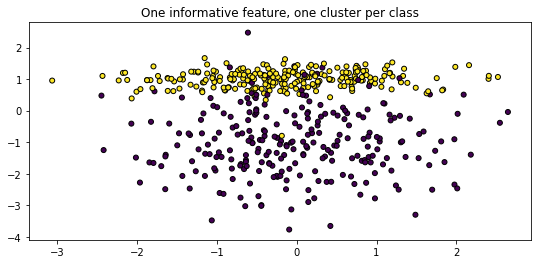

In [400]:
plt.figure(figsize=(9, 4))
plt.title("One informative feature, one cluster per class")
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

In [423]:
def normalize(X, y):
    Xh = X[:, 0].copy()
    X[:, 0] = (Xh - np.min(Xh)) / (np.max(Xh) - np.min(Xh))
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    return X, y

def denormalize(X, y, theta):
    Xh = X[:, 0].copy()
    a, b, c, d = np.min(y), np.max(y) - np.min(y), np.min(Xh), np.max(Xh) - np.min(Xh)
    theta_hat = np.array([b * theta[0] / d, b*theta[1] + a - c*b*theta[0]/d])
    return theta_hat

class Perceptron():
    
    def __init__(self, X, y):
        self._W = np.zeros(X.shape[1]) + 1e-5  # np.random.uniform(size=X.shape[1])
        self._trained_W = self._W
        self.X = X
        self.y = y
    
    def _gradient(self, error):
        return (2 / self.X.shape[0]) * np.dot(self.X.T, error)
    
    def cross_entropy(self, Yh, y):
        return -np.log(1 - Yh)
    
    def train(self, epochs=50000, lr=1e-5):
        error_step = []
        total_expected_error = 0
        for i in range(epochs):
            error = self.predict(self.X) - self.y
            total_error = np.sum(error**2)
            if np.abs(total_expected_error-total_error) < 1e-15:
                return np.array(error_step)
            total_expected_error = total_error
            error_step.append(total_error)
            gd = self._gradient(error)
            self._trained_W -= lr * gd
        return np.array(error_step)
    
    def predict(self, Z):
        activation = self.cross_entropy(np.dot(Z, self._trained_W), self.y)
        return np.where(activation >= 0.0, 1, 0)

Acurácia: 94.67%


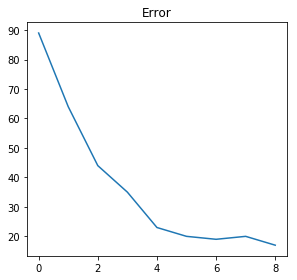

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
A = np.c_[X_train, np.ones(len(X_train))]
B = np.c_[X_test, np.ones(len(X_test))]

md = Perceptron(A.copy(), y_train.copy())
error = md.train()

predYm = md.predict(B)
print(f'Acurácia: {np.round((np.sum(predYm == y_test) / len(y_test)) * 100, 2)}%')

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Error')
plt.plot(range(len(error)), error)
plt.tight_layout()
plt.show()

In [420]:
clf = skPerceptron(tol=1e-3, alpha=1e-5, random_state=0)
clf.fit(A, y_train)
predY = clf.predict(B)
print(f'Acurácia: {np.round(clf.score(B, y_test) * 100, 2)}%')

Acurácia: 94.0%
